# Sust-Enablers

## *Empowering Sustainable Investment Decisions*

A Python-powered fintech platform designed to support impact driven
funds and ESG oriented investors in identifying and directing their
capital toward responsible, high-performing, and sustainable investment
opportunities.

## Our Solution

Sust-Enablers gives decision-makers precise information to find, assess,
and take action on sustainable investment opportunities by combining
carbon analytics, machine learning, and carbon credit trading
simulations. The goal is to allow funds to maintain high financial
returns while coordinating their investment strategy with the mandate’s
sustainability goals.

**Key features** of our platform:

1.  **Automated carbon emission calculation** for each company using
    financial and operational data.  
2.  **Threshold detection** to determine whether a firm’s emissions are
    above or below industry standards or regulatory limits.  
3.  A simulation of **carbon credit trading**that projects possible
    expenses or income from compensating for excess emissions.  
4.  **Portfolio optimization tools** to balance returns with carbon
    footprint targets.

## What is a Carbon Credit?

A carbon credit is like a permission slip for pollution: it gives a
company the right to emit one ton of carbon dioxide (CO<sub>2</sub>) or
an equivalent amount of another greenhouse gas.  
Companies that produce less pollution than their limit can sell their
unused credits to others, while those that exceed their limit must buy
credits to make up for it.  
This establishes a market-based framework that incentivizes companies to
reduce emissions and promotes environmentally friendly practices in all
sectors of the economy.

### *How does the Emission Trading Scheme work?*

The UK Emissions Trading Scheme (UK ETS) operates under a
*cap-and-trade* principle.  
The scheme places a cap on the total amount of greenhouse gas emissions
that can be produced by industries like heavy industry, aviation, and
power generation. Allowances, which are tradable units that represent
the right to emit one tonne of CO2 equivalent, make up this cap.

Operators under regulation are required to give up enough allowances
annually to cover their verified emissions. To reduce carbon leakage for
industries subject to global competition, these allowances can be
acquired through government auctions, traded on the secondary market, or
given away for free. The system tightens the supply of allowances by
gradually lowering the cap, which raises the price of carbon and
promotes investment in low-carbon technologies.

As a result, the UK ETS creates a market-based mechanism for reducing
emissions, rewarding businesses that effectively reduce their carbon
footprint while maintaining the country’s overall emissions within the
range of net zero.

## Methodology

Sust-Enablers’ analytical engine integrates environmental, financial,
and operational metrics into a unified sustainability framework.

1.  **Data Collection and Integration**

    - **Sources:** corporate sustainability reports, CDP, EU ETS.  
    - **Automation:** Python’s *pandas* and *requests* libraries are
      used for ingestion, cleaning, and transformation.  
    - **Standardisation:** normalization of emissions data per revenue
      or production unit to enable comparability.

2.  **Emission Estimation Model**  
    For companies lacking full disclosure, emissions are estimated using
    a bottom-up model:

    Emissions = Σᵢ (Eᵢ × EFᵢ)

    *Where Eᵢ = energy consumption and EFᵢ = emission factor.*

    - **NumPy** performs numerical operations.

3.  **Benchmarking and Threshold Analysis**  
    Emission intensities are compared to sectoral or regulatory
    thresholds, derived from:

    - Industry averages  
    - Historical performance benchmarks

    **Classification:**

    - **Exceeding threshold** → must buy credits.  
    - **Within limit** → can sell credits or claim offsets.

4.  **Carbon Credit Trading Simulation**  
    A simplified trading model evaluates the financial implications of
    emission performance.

The outputs from this phase represent:

- **Credit cost** or **sale potential** per company  
- **Portfolio sensitivity** to carbon pricing scenarios  
- **Net-zero alignment scores** for funds

## The Impact of Python Tools on Performance

Python’s open-source ecosystem provides a robust foundation for
sustainability analytics:

1.  **European Carbon Credit Trading (10 companies)**

This subsection introduces the dataset used to simulate the European
carbon credit trading environment. It includes ten representative
companies from diverse industries, each characterized by distinct
emission profiles and revenue scales. The dataset provides the
foundation for comparing carbon intensity levels across sectors and for
testing how variations in carbon pricing could impact financial
performance.

``` python
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

THRESHOLD_INTENSITY = 20.0   # tCO2 per EURm revenue
CARBON_PRICE_EUR = 50.0      # EUR/tCO2
CURRENCY = "EUR"

data = [
    {"company": "Nordwind Energy (DE)", "sector": "Utilities", "intensity": 24.5, "revenue_million": 1250},
    {"company": "Iberica Foods (ES)", "sector": "Consumer", "intensity": 12.2, "revenue_million": 540},
    {"company": "Alpen Steel (AT)", "sector": "Materials", "intensity": 41.8, "revenue_million": 680},
    {"company": "Seine Logistics (FR)", "sector": "Transport", "intensity": 26.1, "revenue_million": 420},
    {"company": "Baltic Tech (LT)", "sector": "Technology", "intensity": 6.8, "revenue_million": 1050},
    {"company": "Vistula Pharma (PL)", "sector": "Healthcare", "intensity": 8.9, "revenue_million": 760},
    {"company": "Adriatic Cement (HR)", "sector": "Materials", "intensity": 47.6, "revenue_million": 390},
    {"company": "Skandia Retail (SE)", "sector": "Consumer", "intensity": 9.7, "revenue_million": 1420},
    {"company": "Danube Shipping (RO)", "sector": "Transport", "intensity": 21.3, "revenue_million": 310},
    {"company": "Apennine Hotels (IT)", "sector": "Services", "intensity": 14.9, "revenue_million": 330},
]

df = pd.DataFrame(data)

from IPython.display import Markdown
display(Markdown(df.to_markdown(index=False, numalign="right", floatfmt=".2f")))
```

| company              | sector     | intensity | revenue_million |
|:---------------------|:-----------|----------:|----------------:|
| Nordwind Energy (DE) | Utilities  |     24.50 |            1250 |
| Iberica Foods (ES)   | Consumer   |     12.20 |             540 |
| Alpen Steel (AT)     | Materials  |     41.80 |             680 |
| Seine Logistics (FR) | Transport  |     26.10 |             420 |
| Baltic Tech (LT)     | Technology |      6.80 |            1050 |
| Vistula Pharma (PL)  | Healthcare |      8.90 |             760 |
| Adriatic Cement (HR) | Materials  |     47.60 |             390 |
| Skandia Retail (SE)  | Consumer   |      9.70 |            1420 |
| Danube Shipping (RO) | Transport  |     21.30 |             310 |
| Apennine Hotels (IT) | Services   |     14.90 |             330 |

This script calculates company-level emissions and intensity ratios
using Pandas and NumPy.

1.  **Threshold Detection**

This section translates emission intensities into measurable financial
outcomes. By combining the emission thresholds with current carbon
pricing levels, the model identifies whether each company operates above
or below its regulatory benchmark and quantifies the corresponding
credit cost or potential revenue. The results below summarise the
overall distribution of carbon positions across the analysed firms.

``` python
# === 2. Threshold Detection ===

# metriche principali
df["emissions_tCO2"] = df["intensity"] * df["revenue_million"]                     # absolute emissions
df["target_emissions_tCO2"] = THRESHOLD_INTENSITY * df["revenue_million"]                 # at threshold

# eccedenze/crediti disponibili (no valori negativi)
df["excess_emissions_tCO2"]    = (df["emissions_tCO2"] - df["target_emissions_tCO2"]).clip(lower=0)
df["available_credits_tCO2"]   = (df["target_emissions_tCO2"] - df["emissions_tCO2"]).clip(lower=0)

# classificazione e impatti economici
df["status"]          = np.where(df["excess_emissions_tCO2"] > 0, "Excess", "Below Threshold")
df["buy_cost_eur"]    = df["excess_emissions_tCO2"]    * CARBON_PRICE_EUR
df["sell_revenue_eur"]= df["available_credits_tCO2"]   * CARBON_PRICE_EUR
df["net_position_eur"]= df["sell_revenue_eur"] - df["buy_cost_eur"]   # +ve = net seller

# ordina e arrotonda
df = df.round(2).sort_values(by="net_position_eur")

# subset utili
sellers = df[df["status"] == "Below Threshold"].copy()
buyers  = df[df["status"] == "Excess"].copy()

total_seller_revenue = sellers["sell_revenue_eur"].sum()
total_buyer_cost     = buyers["buy_cost_eur"].sum()

# ---- OUTPUT TABELLARE (compatibile con PDF) ----
from IPython.display import display, Markdown

print("=== Company Results (sorted by net position) ===")

# Rinomina alcune colonne per rendere la tabella più compatta
rename_map = {
    "revenue_million": "revenue_m",
    "emissions_tCO2": "emiss_tCO2",
    "target_emissions_tCO2": "target_tCO2",
    "excess_emissions_tCO2": "excess_tCO2",
    "available_credits_tCO2": "credits_tCO2",
    "buy_cost_eur": "buy_eur",
    "sell_revenue_eur": "sell_eur",
    "net_position_eur": "net_eur"
}

# Crea una copia del dataframe con nomi più brevi e colonne ordinate
pretty_df = df.rename(columns=rename_map)[[
    "company", "sector", "intensity", "revenue_m",
    "emiss_tCO2", "target_tCO2", "excess_tCO2", "credits_tCO2",
    "status", "buy_eur", "sell_eur", "net_eur"
]]

from IPython.display import display, Markdown
display(Markdown(pretty_df.to_markdown(index=False, numalign="right", floatfmt=".2f")))


print("\n=== Sellers (Below Threshold): expected credit revenue ===")
display(Markdown(sellers[["company","available_credits_tCO2","sell_revenue_eur"]]
                 .to_markdown(index=False, numalign="right", floatfmt=".2f")))

print("\n=== Buyers (Excess): expected credit purchase cost ===")
display(Markdown(buyers[["company","excess_emissions_tCO2","buy_cost_eur"]]
                 .to_markdown(index=False, numalign="right", floatfmt=".2f")))

print(f"\nTOTAL seller revenue (@ {CARBON_PRICE_EUR:.0f} EUR/tCO2): {total_seller_revenue:,.0f} {CURRENCY}")
print(f"TOTAL buyer cost   (@ {CARBON_PRICE_EUR:.0f} EUR/tCO2): {total_buyer_cost:,.0f} {CURRENCY}")

# ---- GRAFICI ----
plt.figure(figsize=(8,6))
plt.scatter(df["intensity"], df["revenue_million"], s=(df["revenue_million"]**0.5)*6)
plt.axvline(THRESHOLD_INTENSITY, linestyle="--")
plt.title("Carbon Intensity vs Revenue (bubble size ~ revenue)")
plt.xlabel("Intensity (tCO2 per EURm revenue)")
plt.ylabel("Revenue (EUR million)")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(df))
ax.bar(x - 0.2, df["buy_cost_eur"],  width=0.4, label="Buy Cost (EUR)")
ax.bar(x + 0.2, df["sell_revenue_eur"], width=0.4, label="Sell Revenue (EUR)")
ax.set_title("Carbon Credit Costs and Revenues by Company")
ax.set_xticks(x)
ax.set_xticklabels(df["company"], rotation=45, ha="right")
ax.set_ylabel("EUR")
ax.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(df["company"], df["net_position_eur"])
plt.title("Net Trading Position (EUR): Positive = Net Seller, Negative = Net Buyer")
plt.xlabel("EUR")
plt.tight_layout()
plt.show()
```

| company | sector | intensity | revenue_m | emiss_tCO2 | target_tCO2 | excess_tCO2 | credits_tCO2 | status | buy_eur | sell_eur | net_eur |
|:--------|:-----|-----:|-----:|-----:|------:|------:|------:|:------|----:|-----:|-----:|
| Alpen Steel (AT) | Materials | 41.80 | 680 | 28424.00 | 13600.00 | 14824.00 | 0.00 | Excess | 741200.00 | 0.00 | -741200.00 |
| Adriatic Cement (HR) | Materials | 47.60 | 390 | 18564.00 | 7800.00 | 10764.00 | 0.00 | Excess | 538200.00 | 0.00 | -538200.00 |
| Nordwind Energy (DE) | Utilities | 24.50 | 1250 | 30625.00 | 25000.00 | 5625.00 | 0.00 | Excess | 281250.00 | 0.00 | -281250.00 |
| Seine Logistics (FR) | Transport | 26.10 | 420 | 10962.00 | 8400.00 | 2562.00 | 0.00 | Excess | 128100.00 | 0.00 | -128100.00 |
| Danube Shipping (RO) | Transport | 21.30 | 310 | 6603.00 | 6200.00 | 403.00 | 0.00 | Excess | 20150.00 | 0.00 | -20150.00 |
| Apennine Hotels (IT) | Services | 14.90 | 330 | 4917.00 | 6600.00 | 0.00 | 1683.00 | Below Threshold | 0.00 | 84150.00 | 84150.00 |
| Iberica Foods (ES) | Consumer | 12.20 | 540 | 6588.00 | 10800.00 | 0.00 | 4212.00 | Below Threshold | 0.00 | 210600.00 | 210600.00 |
| Vistula Pharma (PL) | Healthcare | 8.90 | 760 | 6764.00 | 15200.00 | 0.00 | 8436.00 | Below Threshold | 0.00 | 421800.00 | 421800.00 |
| Baltic Tech (LT) | Technology | 6.80 | 1050 | 7140.00 | 21000.00 | 0.00 | 13860.00 | Below Threshold | 0.00 | 693000.00 | 693000.00 |
| Skandia Retail (SE) | Consumer | 9.70 | 1420 | 13774.00 | 28400.00 | 0.00 | 14626.00 | Below Threshold | 0.00 | 731300.00 | 731300.00 |

Company Results (sorted by net position)

    === Sellers (Below Threshold): expected credit revenue ===

| company              | available_credits_tCO2 | sell_revenue_eur |
|:---------------------|-----------------------:|-----------------:|
| Apennine Hotels (IT) |                1683.00 |         84150.00 |
| Iberica Foods (ES)   |                4212.00 |        210600.00 |
| Vistula Pharma (PL)  |                8436.00 |        421800.00 |
| Baltic Tech (LT)     |               13860.00 |        693000.00 |
| Skandia Retail (SE)  |               14626.00 |        731300.00 |

    === Buyers (Excess): expected credit purchase cost ===

| company              | excess_emissions_tCO2 | buy_cost_eur |
|:---------------------|----------------------:|-------------:|
| Alpen Steel (AT)     |              14824.00 |    741200.00 |
| Adriatic Cement (HR) |              10764.00 |    538200.00 |
| Nordwind Energy (DE) |               5625.00 |    281250.00 |
| Seine Logistics (FR) |               2562.00 |    128100.00 |
| Danube Shipping (RO) |                403.00 |     20150.00 |

    TOTAL seller revenue (@ 50 EUR/tCO2): 2,140,850 EUR
    TOTAL buyer cost   (@ 50 EUR/tCO2): 1,708,900 EUR

<figure>
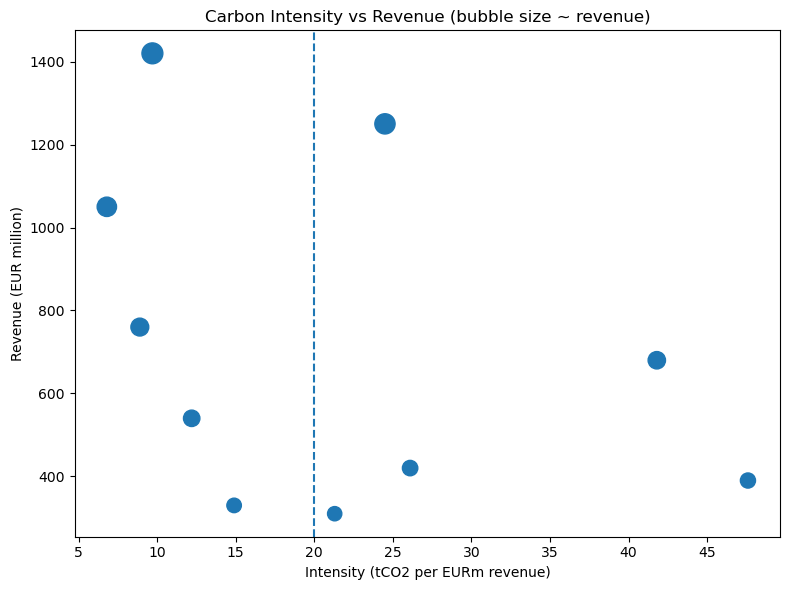
<figcaption aria-hidden="true">Carbon Intensity vs Revenue (bubble size
~ revenue)</figcaption>
</figure>

<figure>
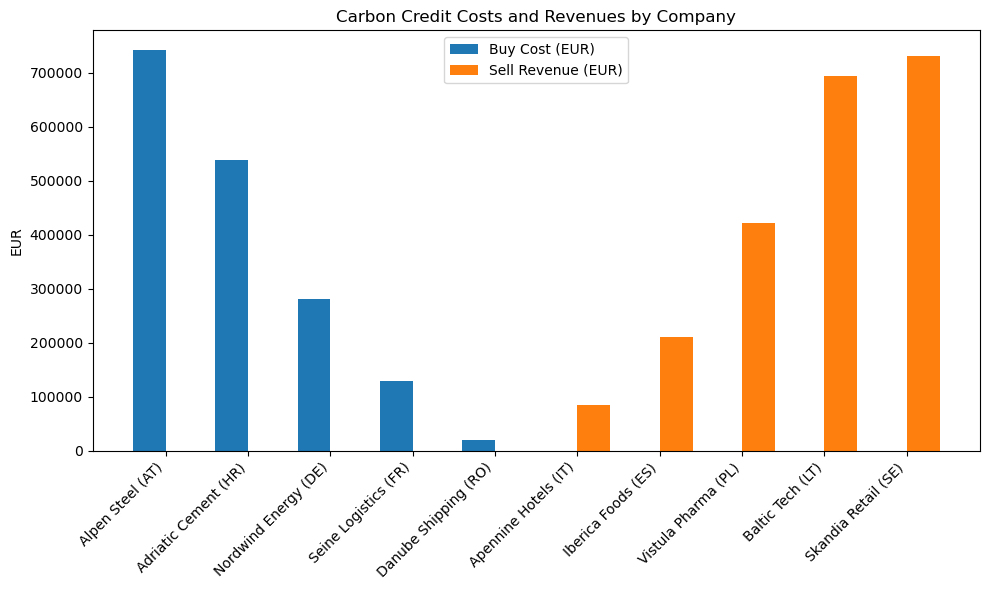
<figcaption aria-hidden="true">Carbon Credit Costs and Revenues by
Company</figcaption>
</figure>

<figure>
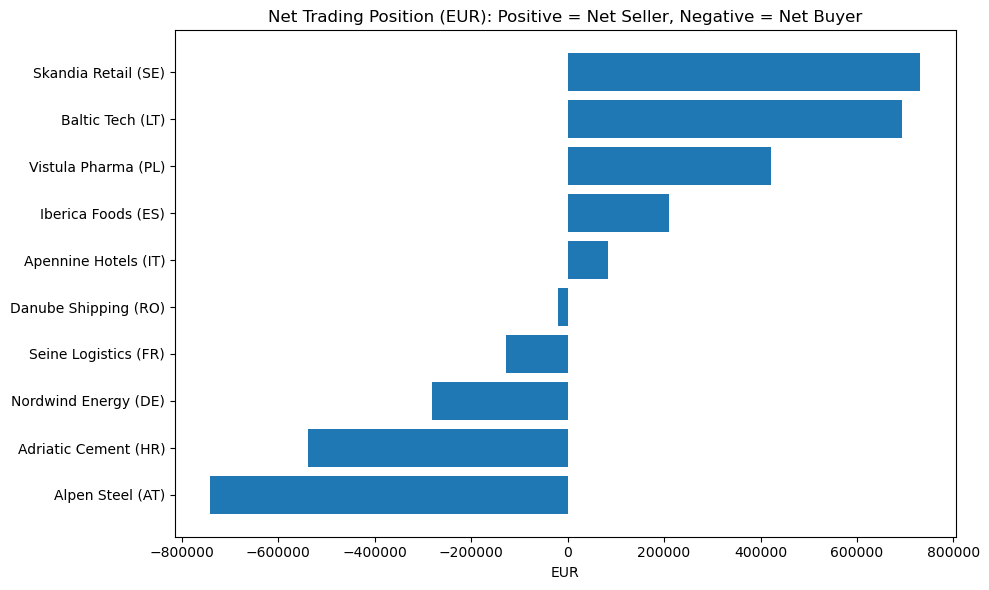
<figcaption aria-hidden="true">Net Trading Position (EUR): Positive =
Net Seller, Negative = Net Buyer</figcaption>
</figure>

## Outcome

The simulation demonstrates the practical value of integrating carbon
metrics with financial analytics. By quantifying both emission
performance and its direct monetary impact, the framework bridges
environmental and economic dimensions that are often analysed
separately. The resulting dataset highlights how even small variations
in emission intensity can translate into significant differences in
carbon credit exposure, directly affecting the cost structure,
investment risk, and profitability of the firms involved.

From an investor’s perspective, these results provide an actionable
layer of intelligence: carbon performance becomes a measurable driver of
value creation rather than a compliance burden. Asset managers can now
assess how efficiently each portfolio company aligns with emission
thresholds and how these dynamics influence overall fund performance in
a tightening regulatory environment.

The outcome of this analysis therefore goes beyond compliance
monitoring: it quantifies the strategic advantage of early
decarbonisation and the financial opportunities available to those
positioned as net sellers of carbon credits. In this sense, the
Sust-Enablers model transforms sustainability from a reporting exercise
into a proactive investment instrument.

## The Target Market

Sust-Enablers is designed for Asset Management firms to have a better
understanding of implementation of sustainable solutions into its
practices, enabling to run the impact driven funds that generate ESG
compliant revenues. The platform allows to access the latest carbon
market data and analytics, providing actionable trading insights ready
for execution. Through the accurate estimation of carbon credit usage,
Asset Managers can leverage their existing corporate client
relationships, deepening the further engagement and transforming the
carbon credits into the real financial and environmental practices.

### *Our Value Proposition for Asset Managers explained*

1.  **Subscription & Data Access**  
    Asset Managers and ESG Funds can use our cutting-edge data analytics
    to access exclusive company-level emission data, and automated
    matching mechanisms that identify the trading potential within the
    range of different companies’ portfolio.

2.  **Network Activation**  
    **Sust-Enablers** enables the Asset Managers to expand their
    corporate client relationships by providing carbon profiles of over
    1 Million firms and their profiles and positions within the
    ecosystem.

3.  **Clearing House Matching System**  
    Companies over their emission limitations that must purchase credits
    and those below limits that can sell are identified by the
    platform’s algorithm as complementing profiles. Afterwards, verified
    trade possibilities are created between them by Sust-Enablers.

4.  **Trade Facilitation**  
    Asset managers act as *intermediaries*, connecting matched companies
    and facilitating credit transactions in a transparent, compliant,
    and profitable environment.

5.  **Additional Revenue Generation**  
    Each transaction creates a value chain, where the Asset Managers
    generate revenue for their impact-driven funds; expand its network
    of the clients and strengthen its reputation in the market.

### *Pricing Model for Asset Managers*

In accordance with the size and complexity of each asset manager’s
portfolio, we will implement a usage-based subscription model. Pricing
is set up to be transparent and to represent the value created by
compliance insights and carbon-credit optimization.

1.  **Platform Subscription (Annual Licence)**  
    Complete access to the analytics dashboard, carbon-credit
    computation engine, reporting suite, and compliance monitoring tools
    is available for a set annual cost. starting at GBP 15,000 annually
    per asset manager.

2.  **Assets Under Management (AUM) Module**  
    An extra variable fee is assessed dependent on the quantity of
    assets or funds linked to the platform in order to account for
    portfolio size and data processing volume. EUR 300 per fund annually
    (discounts applied over 50 funds).

3.  **Carbon Credit Transaction Fee (Optional)**  
    We impose a performance-aligned transaction fee on customers who opt
    to complete carbon-credit purchases or sales via the platform’s
    integrated marketplace. Each carbon-credit transaction is subject to
    a 1.0% fee.

4.  **Enterprise Tier (Custom)**  
    Custom pricing is available for major institutions that need complex
    integrations (API, ESG data pipelines, third-party systems), white
    labelling, or improved compliance modules.

## Conclusion

Sust-Enablers uses machine learning, data science, and carbon market
information to close the gap between sustainability and profitability.
We enable carbon trading insights, benchmark performance, and quantify
emissions to enable investors to make profitable, responsible, and well
informed decisions. Sust-Enablers is aimed to establish itself as the
leading platform for sustainable asset management that generates
quantifiable environmental benefit and financial gain through
transparent analytics and scalable technology.

``` python
```

``` python
```

``` python
```